In [1]:
# 必要なライブラリのインクルード
import os
from math import *
import re
import cv2
from PIL import Image as pilim
from PIL import ImageFilter
import matplotlib.pyplot as plt
import numpy as np
# opencv画像入力用
from IPython.display import display, Image
%matplotlib inline
def display_cv_image(image, format='.JPG'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))
def resizeAndShow(img,num):
    size = (4*num,4*num)
    show_img = cv2.resize(img, size)
    display_cv_image(show_img)
    


(264, 610, 3)


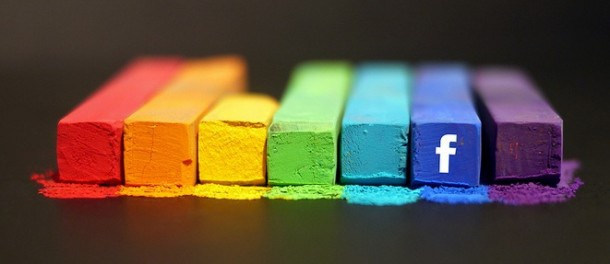

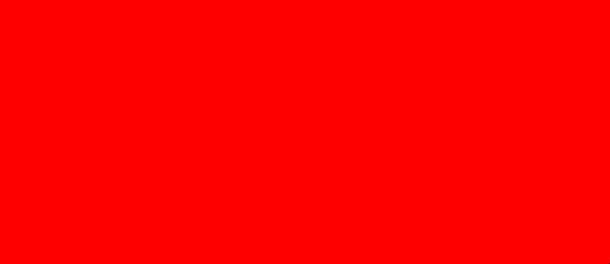

In [108]:
img = cv2.imread("./img/test.jpg")
height = img.shape[0]
width = img.shape[1]
print(img.shape)
display_cv_image(img)

field1 = np.zeros((height,width,3))#ベクトル表示用



lat_vec = np.zeros((height,width,2))#ベクトル配列

lattice = 1
y,x=0,0
while(x+lattice<width):
    while(y+lattice<height):
        if(x-lattice>0 and y-lattice>0):
                lat_vec[y][x][0] = 1*cos(x) #min(lattice,int(x/30)) #int( ( (width/2-x) / abs(width/2-x) )*lattice)
                lat_vec[y][x][1] = 1*sin(x) #min(lattice,int(y/30)) # int( ( (height/2-y) / abs(height/2-y) )*lattice)
        vec_x = int(lat_vec[y][x][0])
        vec_y = int(lat_vec[y][x][1])
        cv2.line(field1, (x, y), (x+vec_x, y+vec_y), (255, 255, 255), 1)
        cv2.line(field1, (x+vec_x, y+vec_y), (x+vec_x, y+vec_y), (0, 0, 255), 2)
#         lat_vec_reverse[y+vec_y][x+vec_x][0] = -vec_x
#         lat_vec_reverse[y+vec_y][x+vec_x][1] = -vec_y
        y += lattice
#         y += 
    y = 0
    x += lattice
#     x += 1

# x,y = 0,0
# while(x<width):
#     while(y<height):
#         vec_x = int(lat_vec_reverse[y][x][0])
#         vec_y = int(lat_vec_reverse[y][x][1])
#         cv2.line(field2, (x, y), (x+vec_x, y+vec_y), (255, 255, 255), 1)
#         cv2.line(field2, (x+vec_x, y+vec_y), (x+vec_x, y+vec_y), (0, 0, 255), 2)
# #         y += lattice
#         y += 10
#     y = 0
# #     x += lattice
#     x += 10
    
#雑な表示
display_cv_image(field1)
# display_cv_image(field2)

In [109]:
#ベクトル場の補完
def B(num,s):
    if num == 0:
        ans = (1-s)**3/6.0
        return ans
    elif num == 1:
        ans = (3*s**3-6*s**2+4)/6.0
        return ans
    elif num == 2:
        ans = (-3*s**3+3*s**2+3*s+1)/6.0
        return ans
    elif num == 3:
        ans =  s**3/6.0
        return ans
    else:
        return 0

delta = lattice

def myu(x,y,delta):
#     i = abs(x/delta)-1
#     j = abs(y/delta)-1
    u = x/delta - int(x/delta)
    v = y/delta - int(y/delta)
    i = int(abs(x/delta))
    j = int(abs(y/delta))
#     u = x*1.0/delta
#     v = y*1.0/delta
    

    x_value = 0
    y_value = 0
    for m in range(0,2):
        for n in range(0,2):
            if((i+m)*lattice+lattice>=width):
                break
            if((j+n)*lattice+lattice>=height):
                break
            x_value += B(m,u)*B(n,v)*lat_vec[(j+m)*lattice][(i+n)*lattice][0]
            y_value += B(m,u)*B(n,v)*lat_vec[(j+m)*lattice][(i+n)*lattice][1]
#             print(B(m,u))

#     print(x_value)    
#     print("*****")
    return x_value,y_value

In [110]:
x,y = 0,0
vec_field =  np.zeros((height,width,2))
while (x+lattice < width) :
    while(y+lattice<height):
#         if y % lattice+1 != 0 :
        if x %lattice != 0 or y % lattice != 0:
            vec_field[y][x][0], vec_field[y][x][1] = myu(x,y,delta)
        y += 1
    y = 0 
#     print("loop:",x)
    x += 1
vec_field_reverse = np.zeros((height,width,2))

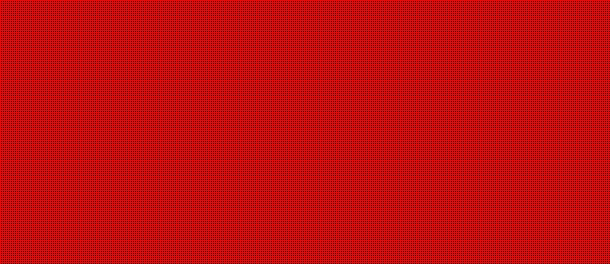

In [111]:
#ただの確認用
field2 = np.zeros((height,width,3))#ベクトル表示用
y,x=0,0
while(x+lattice<width):
    while(y+lattice<height):
        vec_x = int(vec_field[y][x][0])
        vec_y = int(vec_field[y][x][1])
        if(x%lattice == 0 or y %lattice ==0):
            cv2.line(field2, (x, y), (x+vec_x, y+vec_y), (255, 255, 255), 1)
            cv2.line(field2, (x+vec_x, y+vec_y), (x+vec_x, y+vec_y), (0, 0, 255), 2)
#         lat_vec_reverse[y+vec_y][x+vec_x][0] = -vec_x
#         lat_vec_reverse[y+vec_y][x+vec_x][1] = -vec_y
#         y += lattice
        y += 2
    y = 0
#     x += lattice
    x +=2

display_cv_image(field2)

In [112]:
#画素の代入をひたすら

# after_img = np.zeros(img.shape)
# for x in range(0,width):
#     for y in range(0,height):
#         vec_x,vec_y = int(lat_vec_reverse[y][x][0]),int(lat_vec_reverse[y][x][1])
#         after_img[y][x] = img[y+vec_y][x+vec_x]
# display_cv_image(after_img)
# display_cv_image(img)
# print(img.shape)

In [113]:
def transformByVector(img): #見ため的には(xの拡大率、yの拡大率,img)となるようにした。
    width = img.shape[0]
    height = img.shape[1]
    after_img = np.zeros((width,height,3))
    print(after_img.shape)
    print(img.shape)
    print(vec_field.shape)

    for x in range(0,height):
        for y in range(0,width): 
#             print(x,y)
            vec_x = int(vec_field[y][x][0])
            vec_y = int(vec_field[y][x][1])
            alpha = 0
            beta = 0
            if(vec_x == 0):#xの移動がない
                if(vec_y == 0):#(0,0)
                    after_img[y][x] =  img[y][x]
                else:#(0,y)
                    after_img[y][x] =  img[y][x]
                    if y/vec_y == int(y/vec_y):
                        after_img[y][x] =  img[int(y/vec_y)][x]
                    else:
                        alpha = 0.5
                        beta = y/vec_y - int(y/vec_y)
                        y0 = int(y/vec_y)
                        y1 = y0 +1 
                        if y1 >= width:
                            y1 = y0
                        a = img[y0][x]* (1-alpha)* (1-beta) 
                        b = img[y1][x]*alpha* (1-beta)
                        c = img[y0][x]* (1-alpha)*beta
                        d = img[y1][x]*alpha*beta
                        value = a+b+c+d
                        after_img[y][x] = value
            else:#xの移動がある
                if(vec_y == 0):#(x,0)
                    if x/vec_x == int(x/vec_x):
                        after_img[y][x] =  img[y][int(x/vec_x)]
                    else:
                        alpha = x/vec_x - int(x/vec_x)
                        beta = 0.5
                        x0 = int(x/vec_x)
                        x1 = x0 +1 
                        if x1 >=height:
                            x1 = x0
                        a = img[y][x0]* (1-alpha)* (1-beta) 
                        b = img[y][x0]*alpha* (1-beta)
                        c = img[y][x1]* (1-alpha)*beta
                        d = img[y][x1]*alpha*beta
                        value = a+b+c+d
                        after_img[y][x] = value
                else:#(x,y)
                    if x/vec_x == int(x/vec_x) and y/vec_y == int(y/vec_y):
                        after_img[y][x] =  img[int(y/vec_y)][int(x/vec_x)]
                    else:
                        x0 = int(x/vec_x)
                        y0 = int(y/vec_y)
                        x1 = x0 +1
                        y1 = y0 +1 
                        if x1 >=height:
                            x1 = x0
                        if y1 >=width:
                            y1 = y0
                        a = img[y0][x0]* (1-alpha)* (1-beta) 
                        b = img[y1][x0]*alpha* (1-beta)
                        c = img[y0][x1]* (1-alpha)*beta
                        d = img[y1][x1]*alpha*beta
                        value = a+b+c+d
                        after_img[y][x] = value                

    return after_img

(264, 610, 3)
(264, 610, 3)
(264, 610, 2)


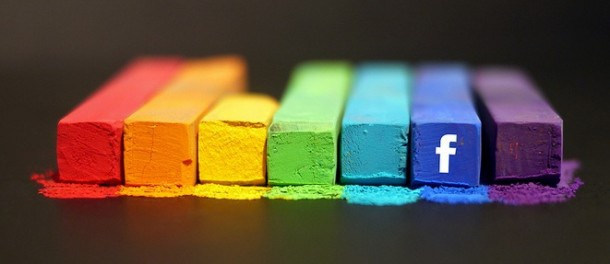

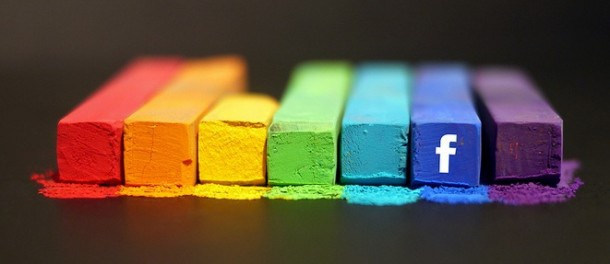

In [114]:
hoge = transformByVector(img)
display_cv_image(hoge)
display_cv_image(img)

<class 'numpy.ndarray'>


In [414]:
print(vec_field.shape)

(264, 610, 2)


In [396]:
for i in range(0,10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [434]:
img[0][264]

array([40, 47, 56], dtype=uint8)